In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('//content//FastagFraudDetection.csv')

In [ ]:
data.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [ ]:
data.shape

(5000, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [ ]:
data["Vehicle_Type"].value_counts()

Bus           716
Car           714
Motorcycle    714
Truck         714
Van           714
Sedan         714
SUV           714
Name: Vehicle_Type, dtype: int64

In [ ]:
data.head(15)

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud
5,6,1/11/2023 10:00,Sedan,FTG-066-GHI-987,A-101,Regular,Medium,160,100,"13.059816123454882, 77.77068662374292",105,KA77KL0123,Fraud
6,7,1/12/2023 15:40,SUV,FTG-707-JKL-210,B-102,Express,Large,180,160,"13.059816123454882, 77.77068662374292",70,KA22MN4567,Fraud
7,8,1/13/2023 20:15,Bus,FTG-088-UVW-543,C-103,Regular,Large,350,90,"13.059816123454882, 77.77068662374292",88,KA21OP8901,Fraud
8,9,1/14/2023 1:55,Car,FTG-909-RST-876,A-101,Express,Small,120,0,"13.059816123454882, 77.77068662374292",45,KA16QR2345,Fraud
9,10,1/15/2023 7:30,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",72,KA22ST6789,Not Fraud


In [ ]:
data[data['FastagID'].isnull()]

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
9,10,1/15/2023 7:30,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",72,KA22ST6789,Not Fraud
16,17,1/22/2023 16:45,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",62,KA20GH1345,Not Fraud
23,24,1/29/2023 3:05,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",77,KA77UV0123,Not Fraud
30,31,2/5/2023 13:20,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",57,KA92IJ5789,Not Fraud
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4966,4967,8/31/2023 6:08,Motorcycle,NaN,D-106,Regular,Small,0,0,"13.21331620748757, 77.55413526894684",47,AP34MN6789,Not Fraud
4973,4974,12/27/2023 19:04,Motorcycle,NaN,D-106,Regular,Small,0,0,"13.21331620748757, 77.55413526894684",84,AP01AB4567,Not Fraud
4980,4981,4/20/2023 6:01,Motorcycle,NaN,D-106,Regular,Small,0,0,"13.21331620748757, 77.55413526894684",74,AP78OP2345,Not Fraud
4987,4988,8/19/2023 18:57,Motorcycle,NaN,D-106,Regular,Small,0,0,"13.21331620748757, 77.55413526894684",90,AP45CD0123,Not Fraud


In [ ]:
data[(data['Vehicle_Type'] == 'Motorcycle') & (data['Vehicle_Dimensions'] == 'Small') & (data['FastagID'].notnull())]

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
982,983,5/30/2023 15:52,Motorcycle,FTG-456-DEF-012,D-106,Regular,Small,0,0,"13.042660878688794, 77.47580097259879",60,MH15BB3344,Not Fraud
989,990,2/11/2023 13:05,Motorcycle,FTG-567-YZA-123,D-106,Regular,Small,0,0,"13.042660878688794, 77.47580097259879",75,GA01CD5678,Not Fraud
996,997,10/28/2023 10:44,Motorcycle,FTG-678-TUV-234,D-106,Regular,Small,0,0,"13.042660878688794, 77.47580097259879",62,MH03QR3456,Not Fraud
1003,1004,7/7/2023 19:40,Motorcycle,FTG-789-OPQ-345,D-106,Regular,Small,0,0,"12.84197701525119, 77.67547528176169",97,AP06EF9012,Not Fraud
1010,1011,3/20/2023 16:54,Motorcycle,FTG-890-JKL-456,D-106,Regular,Small,0,0,"12.84197701525119, 77.67547528176169",61,GA08ST7890,Not Fraud
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,2124,11/5/2023 15:30,Motorcycle,FTG-616-STU-345,D-106,Regular,Small,0,0,"13.21331620748757, 77.55413526894684",76,AP32GH3456,Not Fraud
2130,2131,11/12/2023 11:00,Motorcycle,FTG-247-NOP-456,D-106,Regular,Small,0,0,"13.21331620748757, 77.55413526894684",52,GA34UV1234,Not Fraud
2137,2138,11/19/2023 4:35,Motorcycle,FTG-878-IJK-567,D-106,Regular,Small,0,0,"13.21331620748757, 77.55413526894684",85,MH36IJ7890,Not Fraud
2144,2145,10/16/2023 14:30,Motorcycle,FTG-509-DEF-678,D-106,Regular,Small,0,0,"13.21331620748757, 77.55413526894684",68,AP39WX5678,Not Fraud


In [ ]:
data['FastagID'].fillna('No-fastag', inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               5000 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [ ]:
f = data['FastagID'].unique()

In [ ]:
f.shape

(4452,)

In [ ]:
data.describe()

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
count,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,161.06200,141.261000,67.851200
std,1443.520003,112.44995,106.480996,16.597547
min,1.000000,0.00000,0.000000,10.000000
25%,1250.750000,100.00000,90.000000,54.000000
50%,2500.500000,130.00000,120.000000,67.000000
75%,3750.250000,290.00000,160.000000,82.000000
max,5000.000000,350.00000,350.000000,118.000000


In [ ]:
from sklearn.svm import SVC

In [ ]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [ ]:
data['Date'] = data['Timestamp'].dt.date
data['Time'] = data['Timestamp'].dt.time

In [ ]:
data.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,Date,Time
0,1,2023-01-06 11:20:00,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud,2023-01-06,11:20:00
1,2,2023-01-07 14:55:00,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud,2023-01-07,14:55:00
2,3,2023-01-08 18:25:00,Motorcycle,No-fastag,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud,2023-01-08,18:25:00
3,4,2023-01-09 02:05:00,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud,2023-01-09,02:05:00
4,5,2023-01-10 06:35:00,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud,2023-01-10,06:35:00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Transaction_ID         5000 non-null   int64         
 1   Timestamp              5000 non-null   datetime64[ns]
 2   Vehicle_Type           5000 non-null   object        
 3   FastagID               5000 non-null   object        
 4   TollBoothID            5000 non-null   object        
 5   Lane_Type              5000 non-null   object        
 6   Vehicle_Dimensions     5000 non-null   object        
 7   Transaction_Amount     5000 non-null   int64         
 8   Amount_paid            5000 non-null   int64         
 9   Geographical_Location  5000 non-null   object        
 10  Vehicle_Speed          5000 non-null   int64         
 11  Vehicle_Plate_Number   5000 non-null   object        
 12  Fraud_indicator        5000 non-null   object        
 13  Dat

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
t = data['TollBoothID'].unique()

In [ ]:
data['TollBoothID'].value_counts()

B-102    1432
A-101    1428
C-103    1426
D-106     570
D-105     104
D-104      40
Name: TollBoothID, dtype: int64

In [ ]:
data['Lane_Type'].value_counts()

Regular    2858
Express    2142
Name: Lane_Type, dtype: int64

In [ ]:
data['Vehicle_Dimensions'].value_counts()

Large     2144
Small     1428
Medium    1428
Name: Vehicle_Dimensions, dtype: int64

In [ ]:
data['Geographical_Location'].value_counts()

13.059816123454882, 77.77068662374292    1000
13.042660878688794, 77.47580097259879    1000
12.84197701525119, 77.67547528176169     1000
12.936687032945434, 77.53113977439017    1000
13.21331620748757, 77.55413526894684     1000
Name: Geographical_Location, dtype: int64

In [ ]:
t = data['Time']

In [ ]:
t

0       11:20:00
1       14:55:00
2       18:25:00
3       02:05:00
4       06:35:00
          ...   
4995    22:18:00
4996    13:43:00
4997    05:08:00
4998    20:34:00
4999    00:59:00
Name: Time, Length: 5000, dtype: object

In [ ]:
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.time


In [ ]:
data

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,Date,Time
0,1,2023-01-06 11:20:00,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud,2023-01-06,11:20:00
1,2,2023-01-07 14:55:00,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud,2023-01-07,14:55:00
2,3,2023-01-08 18:25:00,Motorcycle,No-fastag,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud,2023-01-08,18:25:00
3,4,2023-01-09 02:05:00,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud,2023-01-09,02:05:00
4,5,2023-01-10 06:35:00,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud,2023-01-10,06:35:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,2023-01-01 22:18:00,Truck,FTG-445-EDC-765,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,KA74ST0123,Not Fraud,2023-01-01,22:18:00
4996,4997,2023-01-17 13:43:00,Van,FTG-446-LMK-432,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,KA38UV3456,Not Fraud,2023-01-17,13:43:00
4997,4998,2023-02-05 05:08:00,Sedan,FTG-447-PLN-109,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,KA33WX6789,Not Fraud,2023-02-05,05:08:00
4998,4999,2023-02-20 20:34:00,SUV,FTG-458-VFR-876,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,KA35YZ0123,Not Fraud,2023-02-20,20:34:00


In [ ]:
#data[data['Time'] >= datetime.time(6, 00, 0)].count()

In [ ]:
import datetime

# Define a function to map time to time range
def map_time_range(time):
    if time < datetime.time(6, 0, 0):
        return '00 to 06'
    elif time < datetime.time(12, 0, 0):
        return '06 to 12'
    elif time < datetime.time(18, 0, 0):
        return '12 to 18'
    else:
        return '18 to 00'

# Apply the function to create the new column
data['Time_Range'] = data['Time'].apply(map_time_range)


In [ ]:
data.tail()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,Date,Time,Time_Range
4995,4996,2023-01-01 22:18:00,Truck,FTG-445-EDC-765,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,KA74ST0123,Not Fraud,2023-01-01,22:18:00,18 to 00
4996,4997,2023-01-17 13:43:00,Van,FTG-446-LMK-432,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,KA38UV3456,Not Fraud,2023-01-17,13:43:00,12 to 18
4997,4998,2023-02-05 05:08:00,Sedan,FTG-447-PLN-109,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,KA33WX6789,Not Fraud,2023-02-05,05:08:00,00 to 06
4998,4999,2023-02-20 20:34:00,SUV,FTG-458-VFR-876,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,KA35YZ0123,Not Fraud,2023-02-20,20:34:00,18 to 00
4999,5000,2023-03-10 00:59:00,Bus,FTG-459-WSX-543,C-103,Regular,Large,330,125,"13.21331620748757, 77.55413526894684",86,KA37AB3456,Fraud,2023-03-10,00:59:00,00 to 06


In [ ]:
data2 = data.drop(["Transaction_ID","Timestamp","FastagID","Vehicle_Plate_Number","Time"],axis = 1)

In [ ]:
data2.head()

,Vehicle_Type,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Fraud_indicator,Date,Time_Range
0,Bus,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,Fraud,2023-01-06,06 to 12
1,Car,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,Fraud,2023-01-07,12 to 18
2,Motorcycle,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,Not Fraud,2023-01-08,18 to 00
3,Truck,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,Fraud,2023-01-09,00 to 06
4,Van,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,Fraud,2023-01-10,06 to 12


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()


In [ ]:
label_data_Vehicle_Type = label_encoder.fit_transform(data2['Vehicle_Type'])

In [ ]:
data2['label_data_Vehicle_Type']=label_data_Vehicle_Type

In [ ]:
data2['label_data_TollBoothID']=label_encoder.fit_transform(data2['TollBoothID'])

In [ ]:
data2['label_data_Lane_Type']=label_encoder.fit_transform(data2['Lane_Type'])
data2['label_data_Vehicle_Dimensions']=label_encoder.fit_transform(data2['Vehicle_Dimensions'])
data2['label_data_Geographical_Location']=label_encoder.fit_transform(data2['Geographical_Location'])
data2['label_data-Fraud_indicator']=label_encoder.fit_transform(data2['Fraud_indicator'])
data2['label_data_Date']=label_encoder.fit_transform(data2['Date'])
data2['label_data_Time_Range']=label_encoder.fit_transform(data2['Time_Range'])

In [ ]:
data2.head()

,Vehicle_Type,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Fraud_indicator,Date,Time_Range,label_data_Vehicle_Type,label_data_TollBoothID,label_data_Lane_Type,label_data_Vehicle_Dimensions,label_data_Geographical_Location,label_data-Fraud_indicator,label_data_Date,label_data_Time_Range
0,Bus,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,Fraud,2023-01-06,06 to 12,0,0,0,0,3,0,5,1
1,Car,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,Fraud,2023-01-07,12 to 18,1,1,1,2,3,0,6,2
2,Motorcycle,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,Not Fraud,2023-01-08,18 to 00,2,3,1,2,3,1,7,3
3,Truck,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,Fraud,2023-01-09,00 to 06,5,2,1,0,3,0,8,0
4,Van,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,Fraud,2023-01-10,06 to 12,6,1,0,1,3,0,9,1


In [ ]:
data3 = data2.drop(["Vehicle_Type","TollBoothID","Lane_Type","Vehicle_Dimensions","Geographical_Location","Fraud_indicator","Date","Time_Range"],axis=1)

In [ ]:
data3.head()

,Transaction_Amount,Amount_paid,Vehicle_Speed,label_data_Vehicle_Type,label_data_TollBoothID,label_data_Lane_Type,label_data_Vehicle_Dimensions,label_data_Geographical_Location,label_data-Fraud_indicator,label_data_Date,label_data_Time_Range
0,350,120,65,0,0,0,0,3,0,5,1
1,120,100,78,1,1,1,2,3,0,6,2
2,0,0,53,2,3,1,2,3,1,7,3
3,350,120,92,5,2,1,0,3,0,8,0
4,140,100,60,6,1,0,1,3,0,9,1


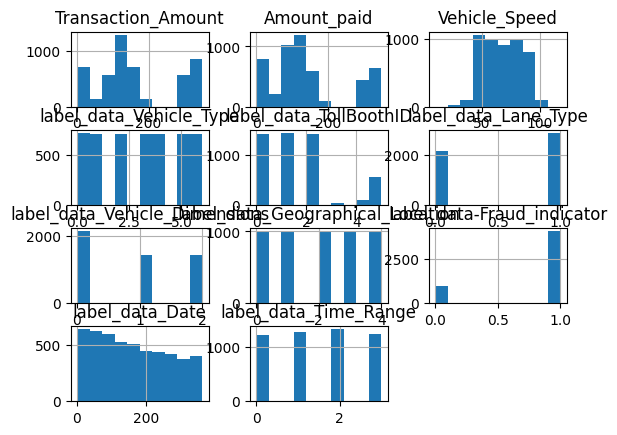

In [ ]:
data3.hist()
plt.show()

<Axes: >

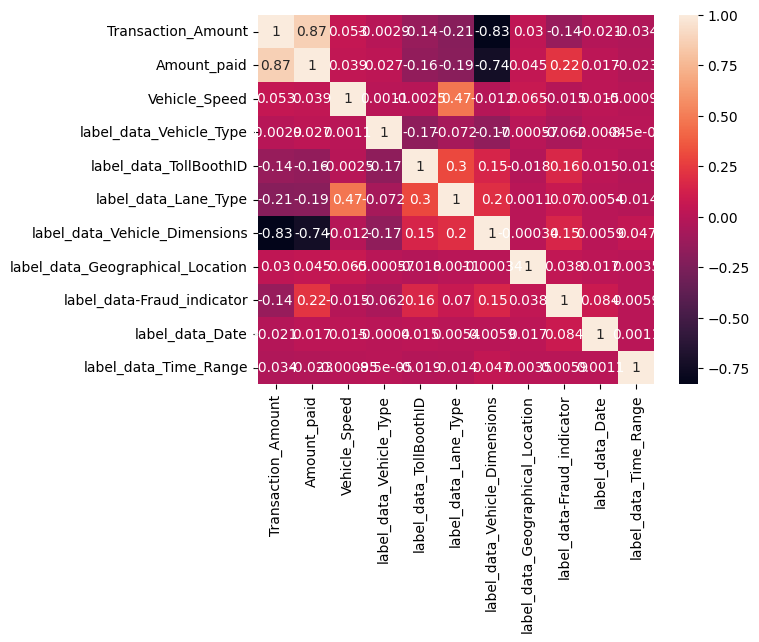

In [ ]:
sns.heatmap(data3.corr(),annot=True)

In [ ]:
x= data3.drop('label_data-Fraud_indicator',axis = 1)
y= data3["label_data-Fraud_indicator"]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [ ]:
x_train,x_test, y_train, y_test = train_test_split(x,y,train_size=0.8, random_state=400)

In [ ]:
model=SVC()

In [ ]:
model.fit(x_train,y_train)

SVC()

In [ ]:
model.score(x_train,y_train)

0.97625

In [ ]:
model.score(x_test,y_test)

0.976

In [ ]:
model2=DecisionTreeClassifier()

In [ ]:
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
model2.score(x_train, y_train)

1.0

In [ ]:
model2.score(x_test,y_test)

0.994

In [ ]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [ ]:
#SVC
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
c=confusion_matrix(y_test,y_pred)

<Axes: >

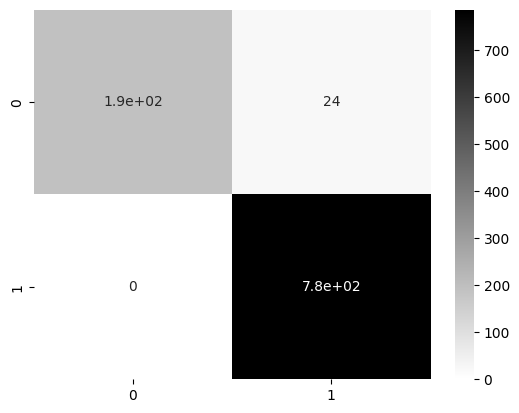

In [ ]:
sns.heatmap(c,annot=True,cmap="binary")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94       215
           1       0.97      1.00      0.98       785

    accuracy                           0.98      1000
   macro avg       0.99      0.94      0.96      1000
weighted avg       0.98      0.98      0.98      1000



In [ ]:
#DecisionTree
y_pred2 = model2.predict(x_test)
accuracy = accuracy_score(y_test, y_pred2)


In [ ]:
c2=confusion_matrix(y_test,y_pred2)

<Axes: >

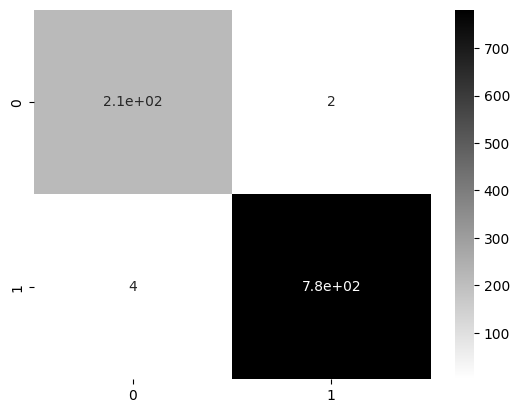

In [ ]:
sns.heatmap(c2,annot=True,cmap="binary")

In [ ]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       215
           1       1.00      0.99      1.00       785

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000

